# Predictive Modeling on Student Performance Data

### Instrucions For project: 

1. Download the "Student Performance" dataset from Kaggle: https://www.kaggle.com/spscientist/students-performance-in-exams
2. Build a predictive model to predict the __*math score*__ of a student based on other variables such as gender, race/ethnicity, parental level of education, lunch, and test preparation course.
3. __Use__ supervised learning algorithms such as __decision trees, logistic regression, and random forests__ to build the model.
4. __Evaluate__ the model __using appropriate metrics such as__ accuracy, precision, recall, and F1 score.
5. __Use feature selection techniques__ to identify the most important features for predicting the math score.
6. Submit the Jupyter Notebook and report as the deliverables.


## 1) Importing necessary Library

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## 2) Loading Data into a dataframe

In [13]:
# Load the dataset in csv file
df = pd.read_csv('StudentsPerformance.csv')

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3) Data Preprocessing

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
df.rename(columns = {'gender':'Gender',
                     'race/ethnicity':'Race',
                     'parental level of education':'ParentEducation',
                     'lunch':'Lunch',
                     'test preparation course':'Course',
                     'math score':'Math',
                     'reading score':'Reading',
                     'writing score':'Writing'}, inplace = True)

In [17]:
df.head()

,Gender,Race,ParentEducation,Lunch,Course,Math,Reading,Writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
df.describe()

,Math,Reading,Writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
df['Race'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race, dtype: int64

In [20]:
df['ParentEducation'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: ParentEducation, dtype: int64

## 4) Data Visualisation

<AxesSubplot:xlabel='Math', ylabel='count'>

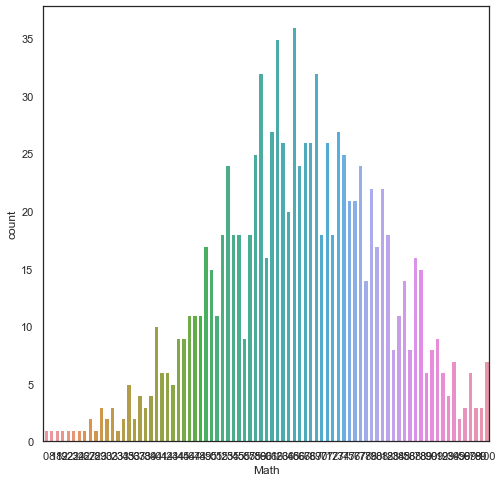

In [47]:
sns.set(style = "white")
sns.countplot(x = "Math", data = df)

In [21]:
# some formatting 
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]})

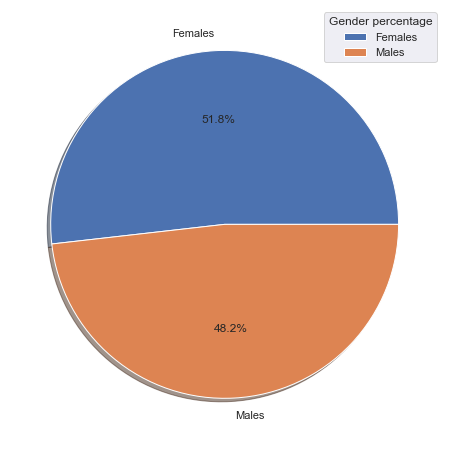

In [22]:
plt.pie(df['Gender'].value_counts(),labels=['Females','Males'],shadow = True,autopct='%1.1f%%')
plt.legend(title = "Gender percentage")
plt.show()

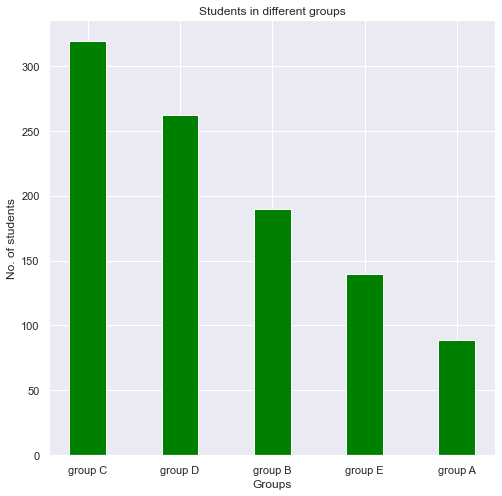

In [23]:
plt.bar(df['Race'].value_counts().index, df['Race'].value_counts(), color ='green',
        width = 0.4)
 
plt.xlabel("Groups")
plt.ylabel("No. of students")
plt.title("Students in different groups")
plt.show()

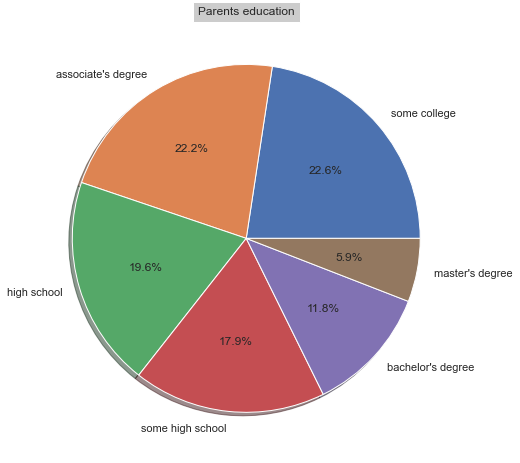

In [24]:
plt.pie(df['ParentEducation'].value_counts(),labels=df['ParentEducation'].value_counts().index,shadow = True,autopct='%1.1f%%')
plt.title("Parents education", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

## Now, let's have a look how reading score and writing score are related to each other
### Let us create scatter plots to examine the scores

### Scatter plot reading score vs writing score :

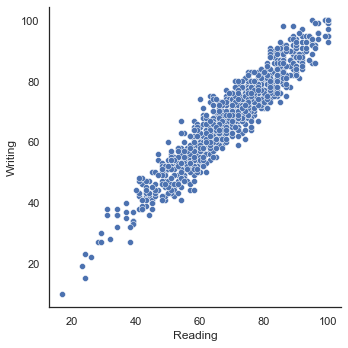

In [51]:
sns.relplot(x = 'Reading', y = 'Writing', data = df)

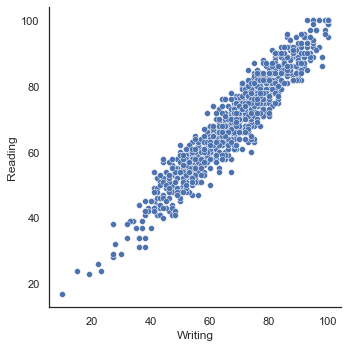

In [52]:
sns.relplot(x='Writing', y = 'Reading', data = df)

#### From the graph it is quite clear that the reading score and writing score are linearly related. Let's find the linear correlation coefficient between the scores using numpy package

In [53]:
r = np.corrcoef(df["Reading"], df["Writing"])[0, 1]
print(r)

0.9545980771462477


#### As we know pearson's linear correlation coefficient lies between -1 to 1. Here the value of the coefficient is 0.95(approx) is near to value 1. So, we conclude that reading score and writing score linearly related

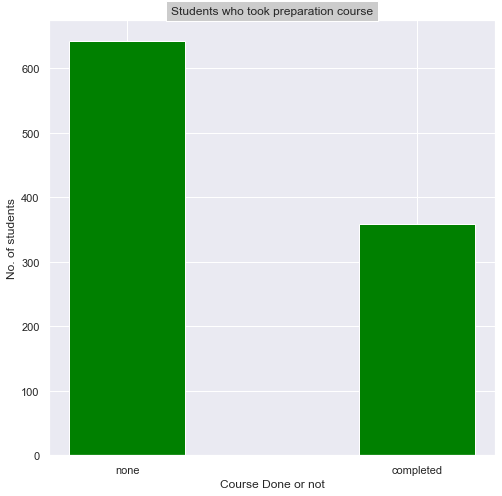

In [25]:
plt.bar(df['Course'].value_counts().index, df['Course'].value_counts(), color ='green',
        width = 0.4)
plt.xlabel("Course Done or not")
plt.ylabel("No. of students")
plt.title("Students who took preparation course",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

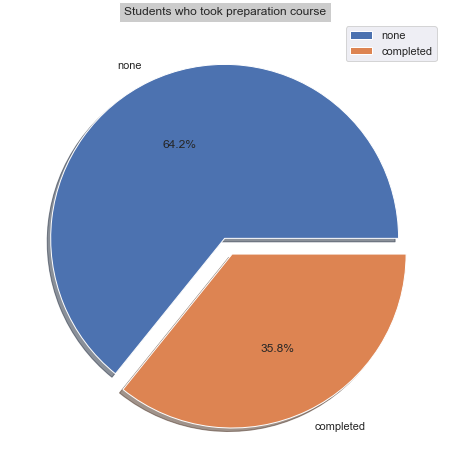

In [26]:
plt.pie(df['Course'].value_counts(),labels=df['Course'].value_counts().index,shadow = True,autopct='%1.1f%%',explode=[0,0.1])
plt.title("Students who took preparation course",bbox={'facecolor':'0.8', 'pad':5})
plt.legend()
plt.show()

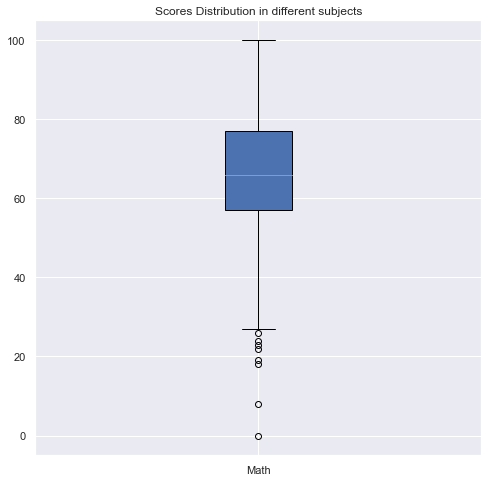

In [27]:
plt.title("Scores Distribution in different subjects")
plt.boxplot(df['Math'],patch_artist=True,labels=['Math'])
plt.show()

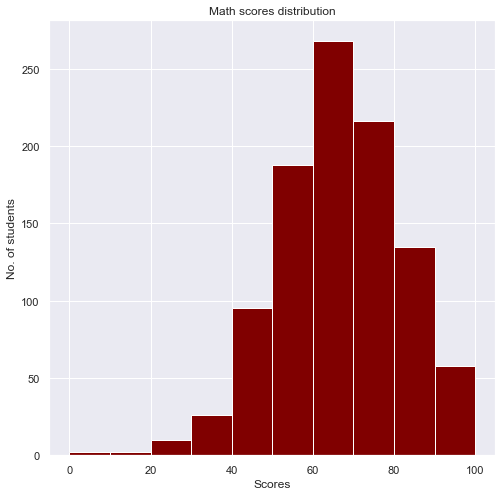

In [28]:
plt.hist(df['Math'],color='maroon')
plt.xlabel('Scores')
plt.ylabel('No. of students')
plt.title('Math scores distribution')
plt.show()

In [29]:
df1= df.groupby('ParentEducation')['Math'].mean().reset_index()
df1

,ParentEducation,Math
0,associate's degree,67.882883
1,bachelor's degree,69.389831
2,high school,62.137755
3,master's degree,69.745763
4,some college,67.128319
5,some high school,63.497207


#### Lets see this data by visualization

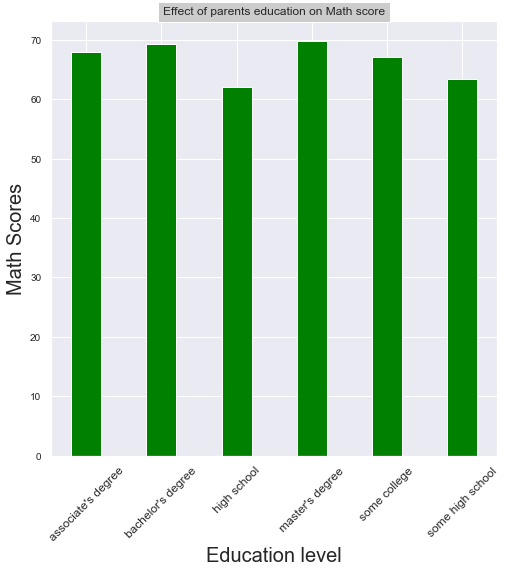

In [30]:
plt.bar(df1['ParentEducation'], df1['Math'], color ='green',
        width = 0.4)
plt.xlabel("Education level",size = 20)
plt.ylabel("Math Scores",size = 20)
plt.xticks(size = 12 ,rotation=45)
plt.yticks(size = 10)
plt.title("Effect of parents education on Math score",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [31]:
df2= df.groupby('Course')['Math'].mean().reset_index()
df2

,Course,Math
0,completed,69.695531
1,none,64.077882


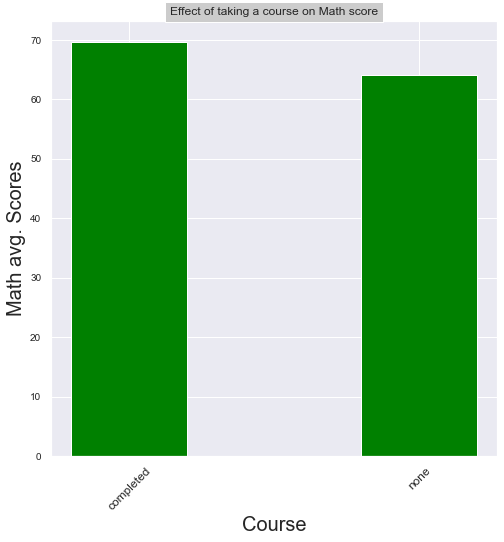

In [32]:
plt.bar(df2['Course'], df2['Math'], color ='green',
        width = 0.4)
plt.xlabel("Course",size = 20)
plt.ylabel("Math avg. Scores",size = 20)
plt.xticks(size = 12 ,rotation=45)
plt.yticks(size = 10)
plt.title("Effect of taking a course on Math score",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [33]:
df3= df.groupby('Gender')['Math'].mean().reset_index()
df3

,Gender,Math
0,female,63.633205
1,male,68.728216


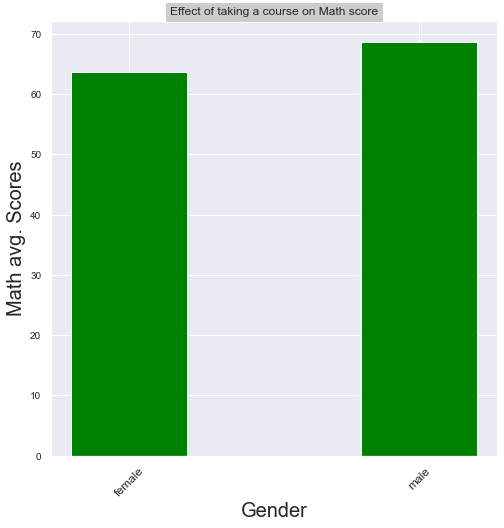

In [34]:
plt.bar(df3['Gender'], df3['Math'], color ='green',
        width = 0.4)
plt.xlabel("Gender",size = 20)
plt.ylabel("Math avg. Scores",size = 20)
plt.xticks(size = 12 ,rotation=45)
plt.yticks(size = 10)
plt.title("Effect of taking a course on Math score",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [35]:
df3= df.groupby('Lunch')['Math'].mean().reset_index()
df3

,Lunch,Math
0,free/reduced,58.921127
1,standard,70.034109


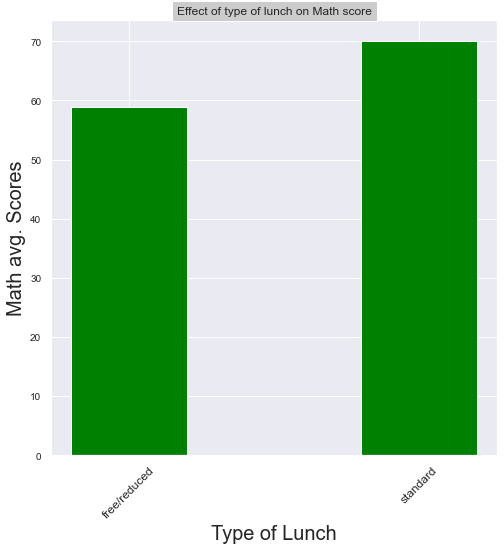

In [36]:
plt.bar(df3['Lunch'], df3['Math'], color ='green',
        width = 0.4)
plt.xlabel("Type of Lunch",size = 20)
plt.ylabel("Math avg. Scores",size = 20)
plt.xticks(size = 12 ,rotation=45)
plt.yticks(size = 10)
plt.title("Effect of type of lunch on Math score",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

## 5) Lets get the data ready for machine learning 

In [37]:
gender={
    'male':1,
    'female':0
}
df['Gender']=df['Gender'].map(gender)

race={
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4,
}
df['Race']=df['Race'].map(race)

Edu={
    "associate's degree":0,
    "bachelor's degree":1,
    "high school":2,
    "master's degree":3,
    "some college":4,
    "some high school":5
}
df['ParentEducation']=df['ParentEducation'].map(Edu)

lunch={
    'free/reduced':0,
    'standard':1
}
df['Lunch']=df['Lunch'].map(lunch)

course={
    'none':0,
    'completed':1
}
df['Course']=df['Course'].map(course)

df

,Gender,Race,ParentEducation,Lunch,Course,Math,Reading,Writing
0,0,1,1,1,0,72,72,74
1,0,2,4,1,1,69,90,88
2,0,1,3,1,0,90,95,93
3,1,0,0,0,0,47,57,44
4,1,2,4,1,0,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,1,88,99,95
996,1,2,2,0,0,62,55,55
997,0,2,2,0,1,59,71,65
998,0,3,4,1,1,68,78,77


## 6) Lets split the training and testing data

In [38]:
from sklearn.model_selection import train_test_split

X=df.loc[:,['Gender' ,'Race' ,'ParentEducation' ,'Lunch' ,'Course','Reading','Writing']]
y=df['Math']
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3,shuffle=True)

## 7) Applying machine learning algorithms


### 7.1) Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
firstModel = LinearRegression()
firstModel = firstModel.fit(X_train,y_train)
print(f"Coefficient of determination(Accuracy): {firstModel.score(X_test,y_test)*100}%")

Coefficient of determination(Accuracy): 87.29514819333966%


### 7.2) Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 64, random_state = 0)
RandomForest = model.fit(X_train, y_train)
y_pred=RandomForest.predict(X_test)
Score = r2_score(y_test, y_pred)
print("\nAccuracy: ", Score*100,"%")


Accuracy:  84.41571466764226 %


### 7.3) LogisticRegression

In [54]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(solver='lbfgs', max_iter=15000)
Logistic.fit(X_train,y_train)
y_pred=Logistic.predict(X_test)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('Accuracy : ',r2_score(y_test,y_pred)*100,"%")

RMSE :  8.916090324052728
MAE :  6.91
Accuracy :  68.04932765464282 %
